# Week 5

In [31]:
#Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary

#Sci-kit learn
import sklearn.model_selection

#Numpy
import numpy as np

#IPython
from IPython.display import clear_output

#Matplotlib
import matplotlib.pyplot as plt

#Dataset
from mlxtend.data import mnist_data



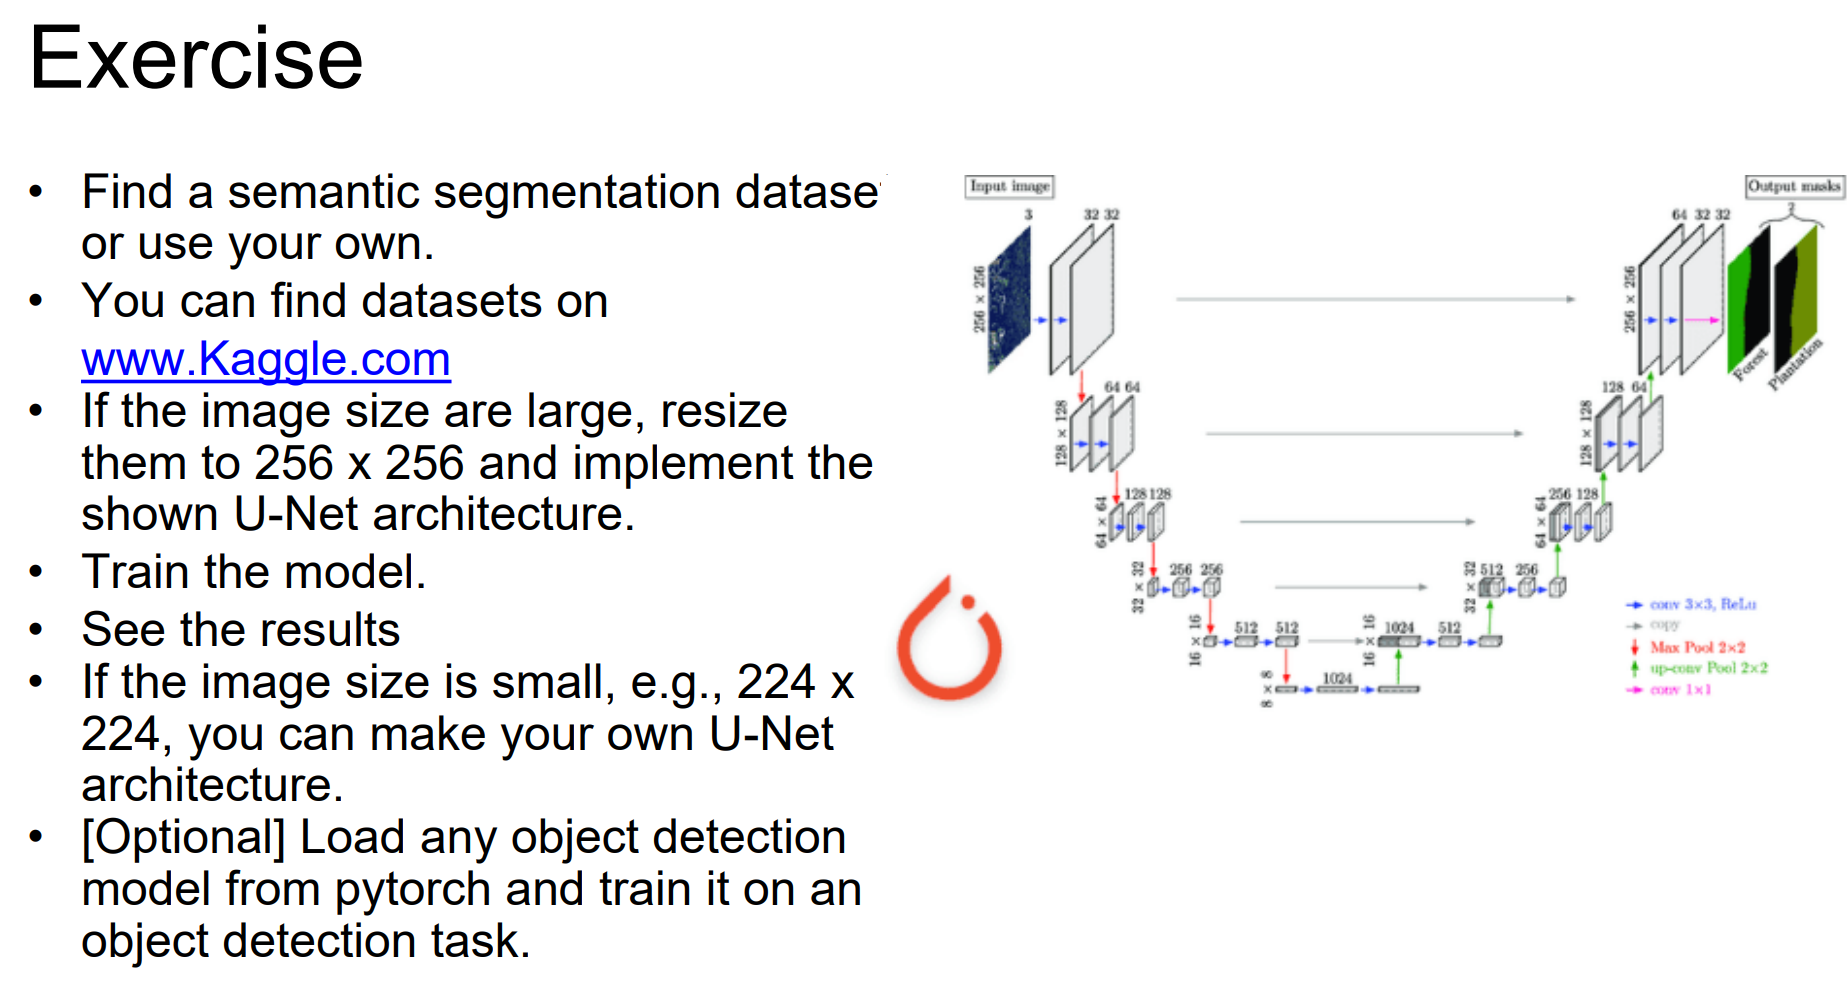

In [64]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda" if torch.cuda.is_available()
     else "cpu"
)
print(f"Using {device} device")

# Define model
class UNET(nn.Module):
    def __init__(self):
        super().__init__()
        #Number of classes in dataset
        num_classes = 10
        #Convolutional Layers
        #Encoding Layers
        self.ConvE1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.ConvE2 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.ConvE3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.ConvE4 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.ConvE5 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.ConvE6 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.ConvE7 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.ConvE8 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.ConvE9 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1)
        self.ConvE10 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        self.ConvE11 = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3,stride=1,padding=1)
        self.ConvE12 = nn.Conv2d(in_channels=1024,out_channels=1024,kernel_size=3,stride=1,padding=1)
        #Decoding Layers
        self.ConvD1 = nn.Conv2d(in_channels=1024,out_channels=512,kernel_size=3,stride=1,padding=1)
        self.ConvD2 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        self.ConvD3 = nn.Conv2d(in_channels=512,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.ConvD4 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.ConvD5 = nn.Conv2d(in_channels=256,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.ConvD6 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.ConvD7 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.ConvD8 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.ConvD9 = nn.Conv2d(in_channels=64,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.ConvD10 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.ConvD11 = nn.Conv2d(in_channels=32,out_channels=num_classes,kernel_size=1,stride=1,padding=1)

    
        #Transposed concolution 
        self.UpConv1 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=2, stride=2, padding=0)
        self.UpConv2 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=2, stride=2, padding=0)
        self.UpConv3 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=2, stride=2, padding=0)
        self.UpConv4 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=2, padding=0)
        self.UpConv5 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, stride=2, padding=0)

        #Pooling Layers
        self.Pool = nn.MaxPool2d(kernel_size=2)

        #Activation Functions
        self.ReLU = nn.ReLU(inplace=True)

    def forward(self, x):
        #Encoding Steps
        x = self.ConvE1(x)
        x = self.ReLU(x)
        x = self.ConvE2(x)
        ff1 = self.ReLU(x)
        x = self.Pool(ff1)

        x = self.ConvE3(x)
        x = self.ReLU(x)
        x = self.ConvE4(x)
        ff2 = self.ReLU(x)
        x = self.Pool(ff2)

        x = self.ConvE5(x)
        x = self.ReLU(x)
        x = self.ConvE6(x)
        ff3 = self.ReLU(x)
        x = self.Pool(ff3)

        x = self.ConvE7(x)
        x = self.ReLU(x)
        x = self.ConvE8(x)
        ff4 = self.ReLU(x)
        x = self.Pool(ff4)

        x = self.ConvE9(x)
        x = self.ReLU(x)
        x = self.ConvE10(x)
        ff5 = self.ReLU(x)
        x = self.Pool(ff5)


        x = self.ConvE11(x)
        x = self.ReLU(x)
        x = self.ConvE12(x)
        x = self.ReLU(x)

        #Decoding Steps
        x = self.UpConv1(x)
        x = torch.cat((ff5,x),axis=1)
        x = self.ConvD1(x)
        x = self.ReLU(x)
        x = self.ConvD2(x)
        x = self.ReLU(x)

        x = self.UpConv2(x)
        x = torch.cat((ff4,x),axis=1)
        x = self.ConvD3(x)
        x = self.ReLU(x)
        x = self.ConvD4(x)
        x = self.ReLU(x)

        x = self.UpConv3(x)
        x = torch.cat((ff3,x),axis=1)
        x = self.ConvD5(x)
        x = self.ReLU(x)
        x = self.ConvD6(x)
        x = self.ReLU(x)

        x = self.UpConv4(x)
        x = torch.cat((ff2,x),axis=1)
        x = self.ConvD7(x)
        x = self.ReLU(x)
        x = self.ConvD8(x)
        x = self.ReLU(x)

        x = self.UpConv5(x)
        x = torch.cat((ff1,x),axis=1)
        x = self.ConvD9(x)
        x = self.ReLU(x)
        x = self.ConvD10(x)
        x = self.ReLU(x)

        #Output Layer
        logits = self.ConvD11(x)

        return logits

model = UNET().to(device)


Using cuda device


In [67]:
summary(model, input_size=(3,256,256)) #summary of neural network

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
              ReLU-2         [-1, 32, 256, 256]               0
            Conv2d-3         [-1, 32, 256, 256]           9,248
              ReLU-4         [-1, 32, 256, 256]               0
         MaxPool2d-5         [-1, 32, 128, 128]               0
            Conv2d-6         [-1, 64, 128, 128]          18,496
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,928
              ReLU-9         [-1, 64, 128, 128]               0
        MaxPool2d-10           [-1, 64, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]          73,856
             ReLU-12          [-1, 128, 64, 64]               0
           Conv2d-13          [-1, 128, 64, 64]         147,584
             ReLU-14          [-1, 128,